In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
import slab as s
reload(s)
from slab import SlabOut, CoolingOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

In [2]:
G0 = 1.
xi_CR = 2.0e-16
Zd = 1. 

In [3]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"
slab = SlabOut(dir_out+"out_sn_cooling_H2CR/", Zd=Zd) 
slab.ReadRates()
slab.ReadThermo()
cooling = CoolingOut(dir_out+"out_sn_cooling_H2CR/", Zd=Zd) 
cooling.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


/anaconda2/lib/python2.7/site-packages/matplotlib/ticker.py:2512: UserWarning: AutoMinorLocator does not work with logarithmic scale
  warnings.warn('AutoMinorLocator does not work with logarithmic '
/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


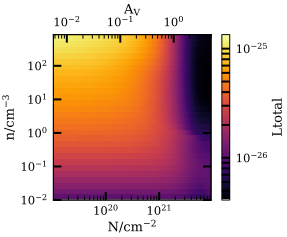

In [4]:
plot_chem.plot_abd(slab, "Ltotal", norm=LogNorm(), 
                   vmin=slab.abd["Ltotal"].min(), vmax=slab.abd["Ltotal"].max(), fig_size_factor=0.7)

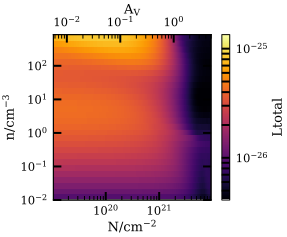

In [5]:
plot_chem.plot_abd(cooling, "Ltotal", norm=LogNorm(), 
                   vmin=slab.abd["Ltotal"].min(), vmax=slab.abd["Ltotal"].max(), fig_size_factor=0.7)

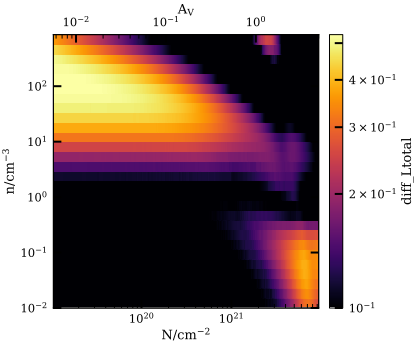

In [6]:
plot_chem.plot_abd(slab, "diff_Ltotal", plot_field=abs(cooling.abd["Ltotal"]/slab.abd["Ltotal"]-1), 
                   norm=LogNorm(), vmin=0.1)

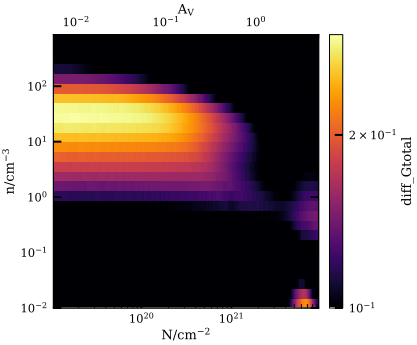

In [7]:
plot_chem.plot_abd(slab, "diff_Gtotal", plot_field=abs(cooling.abd["Gtotal"]/slab.abd["Gtotal"]-1), 
                   norm=LogNorm(), vmin=0.1)

In [8]:
fH2_cr = cu.fH2_CR(slab.nHM, kcr=xi_CR, Zd=Zd)
diff_H2 = abs(cooling.abd["H2"]-fH2_cr)

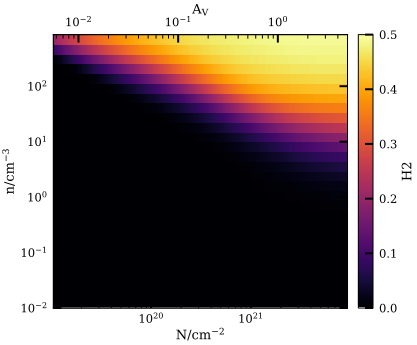

In [9]:
plot_chem.plot_abd(slab, "H2", vmax=0.5, vmin=0)

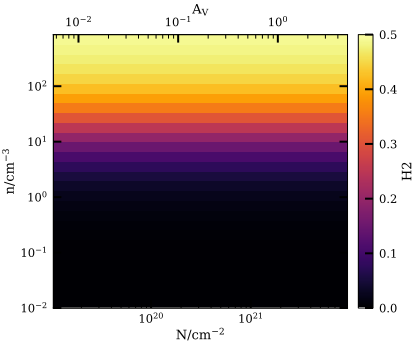

In [10]:
plot_chem.plot_abd(cooling, "H2", vmax=0.5, vmin=0)

In [11]:
fe = np.zeros(slab.nHM.shape)
fe_iter = np.zeros(slab.nHM.shape)
niter = np.zeros(slab.nHM.shape)
GPE = G0*np.exp(-1.87*slab.NHM*Zd/1.87e21)
GCI = G0*np.exp(-3.76*slab.NHM*Zd/1.87e21)
for i in xrange(slab.nHM.shape[0]):
    for j in xrange(slab.nHM.shape[1]):
        fe_iter[i, j], niter[i, j] = cu.fe_iter(slab.nHM[i, j], slab.abd["T"][i, j], GPE[i, j], GCI[i, j],
                                                kcr=xi_CR, Zd=Zd)

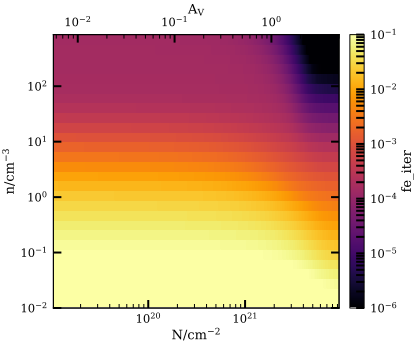

In [12]:
plot_chem.plot_abd(slab, "fe_iter", plot_field=fe_iter, norm=LogNorm(), vmax=0.1, vmin=1e-6)

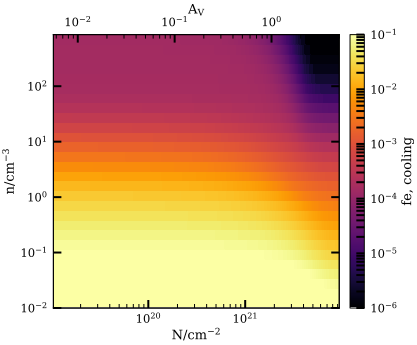

In [13]:
plot_chem.plot_abd(slab, "fe, cooling", plot_field=cooling.abd["e"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [14]:
diff_e_cooling = abs(cooling.abd["e"]/(slab.abd["e"]+1e-5)-1)
diff_e = abs(fe_iter/(slab.abd["e"]+1e-5)-1)

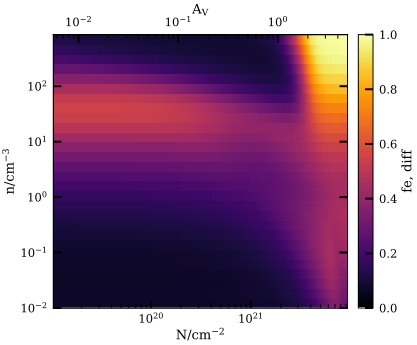

In [15]:
plot_chem.plot_abd(slab, "fe, diff", plot_field=diff_e, vmax=1, vmin=0)

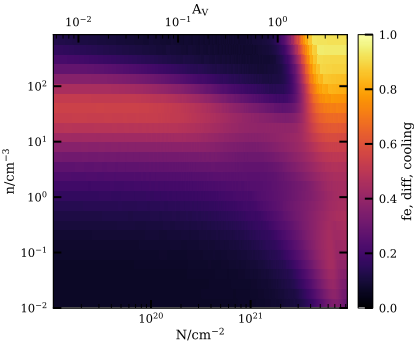

In [16]:
plot_chem.plot_abd(slab, "fe, diff, cooling", plot_field=diff_e_cooling, vmin=0, vmax=1)

In [17]:
fHplus_e = cu.fHplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, kcr=xi_CR, Zd=Zd)
fCplus_e = cu.fCplus_e(fe_iter, slab.nHM, slab.abd["T"], GPE, GCI, kcr=xi_CR, Zd=Zd)

TypeError: fHplus_e() takes at least 5 arguments (6 given)

In [ ]:
plot_chem.plot_abd(slab, "fHplus_e", plot_field=fHplus_e, norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [ ]:
plot_chem.plot_abd(slab, "fHplus_e, cooling", plot_field=cooling.abd["H+"], norm=LogNorm(), vmax=0.1, vmin=1e-6)

In [ ]:
diff_Hplus_cooling = abs(cooling.abd["H+"]/(slab.abd["H+"]+1e-5)-1)
diff_Hplus = abs(fHplus_e/(slab.abd["H+"]+1e-5)-1)

In [ ]:
plot_chem.plot_abd(slab, "fHplus, diff", plot_field=diff_Hplus, vmax=1, vmin=0)

In [ ]:
plot_chem.plot_abd(slab, "fHplus, diff, cooling", plot_field=diff_Hplus_cooling, vmax=1, vmin=0)

In [ ]:
plot_chem.plot_abd(slab, "C+", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
plot_chem.plot_abd(slab, "fCplus_e", plot_field=fCplus_e, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
plot_chem.plot_abd(slab, "fCplus_e, cooling", plot_field=cooling.abd["C+"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
diff_Cplus_cooling = abs(cooling.abd["C+"]/(slab.abd["C+"]+1e-5)-1)
diff_Cplus = abs(fCplus_e/(slab.abd["C+"]+1e-5)-1)

In [ ]:
plot_chem.plot_abd(slab, "fCplus, diff", plot_field=diff_Cplus, vmax=1, vmin=0)

In [ ]:
plot_chem.plot_abd(slab, "fCplus, diff, cooling", plot_field=diff_Cplus_cooling, vmax=1, vmin=0)

In [ ]:
plot_chem.plot_abd(slab, "CO", norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
GCO = G0*np.exp(-3.88*slab.NHM*Zd/1.87e21)
fCO = cu.fCO(slab.nHM, fCplus_e, fH2_cr, GCO, kcr=xi_CR, Zd=Zd)

In [ ]:
plot_chem.plot_abd(slab, "fCO", plot_field=fCO, norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
plot_chem.plot_abd(slab, "fCO, cooling", plot_field=cooling.abd["CO"], norm=LogNorm(), vmax=2e-4, vmin=1e-6)

In [ ]:
diff_CO_cooling = abs((cooling.abd["CO"]-slab.abd["CO"])/(slab.abd["CO"]+1e-5))
diff_CO = abs( (fCO-slab.abd["CO"])/(slab.abd["CO"]+1e-5))

In [ ]:
plot_chem.plot_abd(slab, "fCO, diff", plot_field=diff_CO, vmax=1, vmin=0)

In [ ]:
plot_chem.plot_abd(slab, "fCO, diff, cooling", plot_field=diff_CO_cooling, vmax=1, vmin=0)

In [ ]:
cooling_new = CoolingOut(dir_out+"out_sn_cooling/", Zd=Zd) 
cooling_new.ReadThermo()

In [ ]:
nH = 100
fig = plt.figure(figsize=[12, 6])
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_chem.plot_thermo_nH(ax1, slab, nH, plot_unimportant=False)
plot_chem.plot_thermo_nH(ax2, cooling, nH)

In [ ]:
nH = 100
fig = plt.figure(figsize=[12, 6])
ax1 = fig.add_subplot(121)
plot_chem.plot_thermo_nH(ax1, slab, nH)
plot_chem.plot_thermo_nH(ax1, cooling, nH, linestyle=":", plot_legend=False)
ax2 = fig.add_subplot(122)
plot_chem.plot_thermo_nH(ax2, slab, nH)
plot_chem.plot_thermo_nH(ax2, cooling_new, nH, linestyle=":", plot_legend=False)

In [ ]:
print slab.GetAbd("H", nH=0.1, NH=1e17)/0.891

In [ ]:
fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(111)
plot_chem.plot_abd_all_nH(ax, slab, 10)

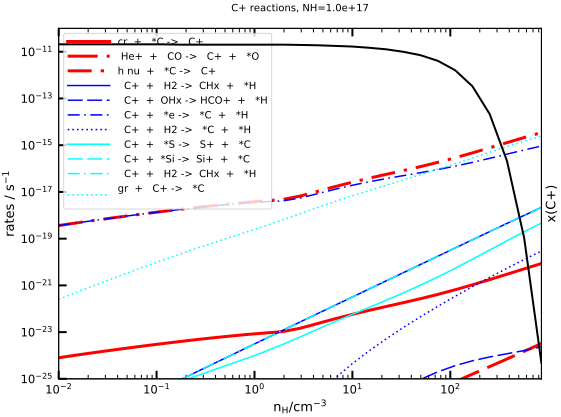

In [277]:
plot_chem.plot_rates_NH(slab, 1e17, "C+")

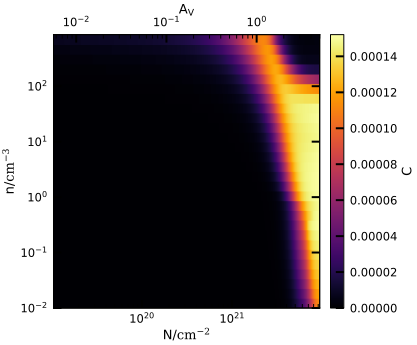

In [280]:
plot_chem.plot_abd(slab, "C")

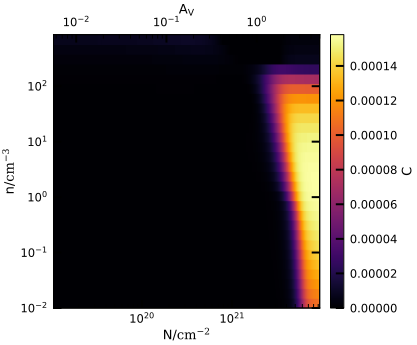

In [281]:
plot_chem.plot_abd(cooling, "C")